DSC 412 - Project - Iowa House Price Prediction

Tharun Reddy Mandadi

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [10]:
import pkg_resources

# List of libraries you want to check
libraries = ['numpy', 'pandas', 'scikit-learn', 'matplotlib', 'seaborn']

# Get the version of each library
for library in libraries:
    try:
        version = pkg_resources.get_distribution(library).version
        print(f'{library}: {version}')
    except pkg_resources.DistributionNotFound:
        print(f'{library} is not installed')


numpy: 1.26.4
pandas: 2.2.2
scikit-learn: 1.4.2
matplotlib: 3.8.4
seaborn: 0.13.2


In [14]:
df = pd.read_excel("IA_House_Price_Original_Data.xlsx",header =3)

Data Exploration

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Unnamed: 81,Unnamed: 82
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,NaN,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,NaN,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,NaN,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,NaN,NaN


In [19]:
df.nunique()

Id               2908
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1943
                 ... 
SaleType            9
SaleCondition       6
SalePrice        1022
Unnamed: 81         0
Unnamed: 82         1
Length: 83, dtype: int64

In [21]:
num_datapoints = df.shape[0]
num_datapoints

2908

In [23]:
# checking for missing values for the entire dataset
for column in df.columns:
    num_unique_values = df[column].nunique()
    num_missing_values = df[column].isna().sum()
    print(f"Column: {column}")
    print(f"Unique values: {num_unique_values}")
    print(f"Total data points: {num_datapoints}")
    print(f"Missing values (NaN): {num_missing_values}")
    print(f"Percentage of unique values: {num_unique_values / num_datapoints * 100:.2f}%")
    print("-" * 40)

Column: Id
Unique values: 2908
Total data points: 2908
Missing values (NaN): 0
Percentage of unique values: 100.00%
----------------------------------------
Column: MSSubClass
Unique values: 16
Total data points: 2908
Missing values (NaN): 0
Percentage of unique values: 0.55%
----------------------------------------
Column: MSZoning
Unique values: 5
Total data points: 2908
Missing values (NaN): 3
Percentage of unique values: 0.17%
----------------------------------------
Column: LotFrontage
Unique values: 128
Total data points: 2908
Missing values (NaN): 486
Percentage of unique values: 4.40%
----------------------------------------
Column: LotArea
Unique values: 1943
Total data points: 2908
Missing values (NaN): 0
Percentage of unique values: 66.82%
----------------------------------------
Column: Street
Unique values: 2
Total data points: 2908
Missing values (NaN): 0
Percentage of unique values: 0.07%
----------------------------------------
Column: Alley
Unique values: 2
Total data 

In [25]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

MSZoning           3
LotFrontage      486
Alley           2711
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1760
MasVnrArea        23
BsmtQual          79
BsmtCond          80
BsmtExposure      80
BsmtFinType1      77
BsmtFinType2      78
Electrical         1
BsmtFullBath       1
BsmtHalfBath       1
KitchenQual        1
FireplaceQu     1416
GarageType       157
GarageYrBlt      158
GarageFinish     158
GarageQual       158
GarageCond       158
PoolQC          2902
Fence           2340
MiscFeature     2803
SaleType           1
Unnamed: 81     2908
Unnamed: 82     2907
dtype: int64


2) Clean the data set (IA_House_Price_Original_Data.xlsx)

In [28]:
# Missing values = Median for numerical variables
num_columns = df.select_dtypes(include=[np.number]).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].median())

# Missing values with most frequent class for categorical variables
cat_columns = df.select_dtypes(include=[object]).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [30]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows found
num_duplicates = len(duplicate_rows)
num_duplicates

0

In [32]:
# Recheck for missing data
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Unnamed: 81    2908
dtype: int64


4)Choose the 47 features used in Section 4.3 and list all of them.

In [35]:
# List of relevant features from the project description 
selected_features = [
    'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
    'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'Neighborhood', 'BsmtQual','SalePrice'
]

#Feature Selection
df_selected = df[selected_features]

In [37]:
# Convert BsmtQual to numerical values based on ranking
bsmt_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} 

df_selected['BsmtQual'] = df_selected['BsmtQual'].map(bsmt_mapping)

/var/folders/vv/7vkkj1yn2qv088dtvzjng4r00000gn/T/ipykernel_27178/2799369638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['BsmtQual'] = df_selected['BsmtQual'].map(bsmt_mapping)


In [39]:
# One-hot encoding for the categorical variable - Neighborhood
df_selected = pd.get_dummies(df_selected, columns=['Neighborhood'], drop_first=True)


print(f"DataFrame shape:{df_selected.shape}")
print(df_selected.head())

DataFrame shape:(2908, 47)
   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0     8450            7            5       2003          2003         706   
1     9600            6            8       1976          1976         978   
2    11250            7            5       2001          2002         486   
3     9550            7            5       1915          1970         216   
4    14260            8            5       2000          2000         655   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  Neighborhood_NoRidge  \
0        150          856       856       854  ...                 False   
1        284         1262      1262         0  ...                 False   
2        434          920       920       866  ...                 False   
3        540          756       961       756  ...                 False   
4        490         1145      1145      1053  ...                  True   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighb

In [41]:
# List all the features as per section 4.3 of the textbook
print(df_selected.columns)

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'BsmtQual', 'SalePrice', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker'],
      dtype='object')


In [43]:
num_features = df_selected.shape[1] 
print(f"Number of features: {num_features}")

Number of features: 47


Exploratory Data Analysis 

In [46]:
df_cleaned = df_selected

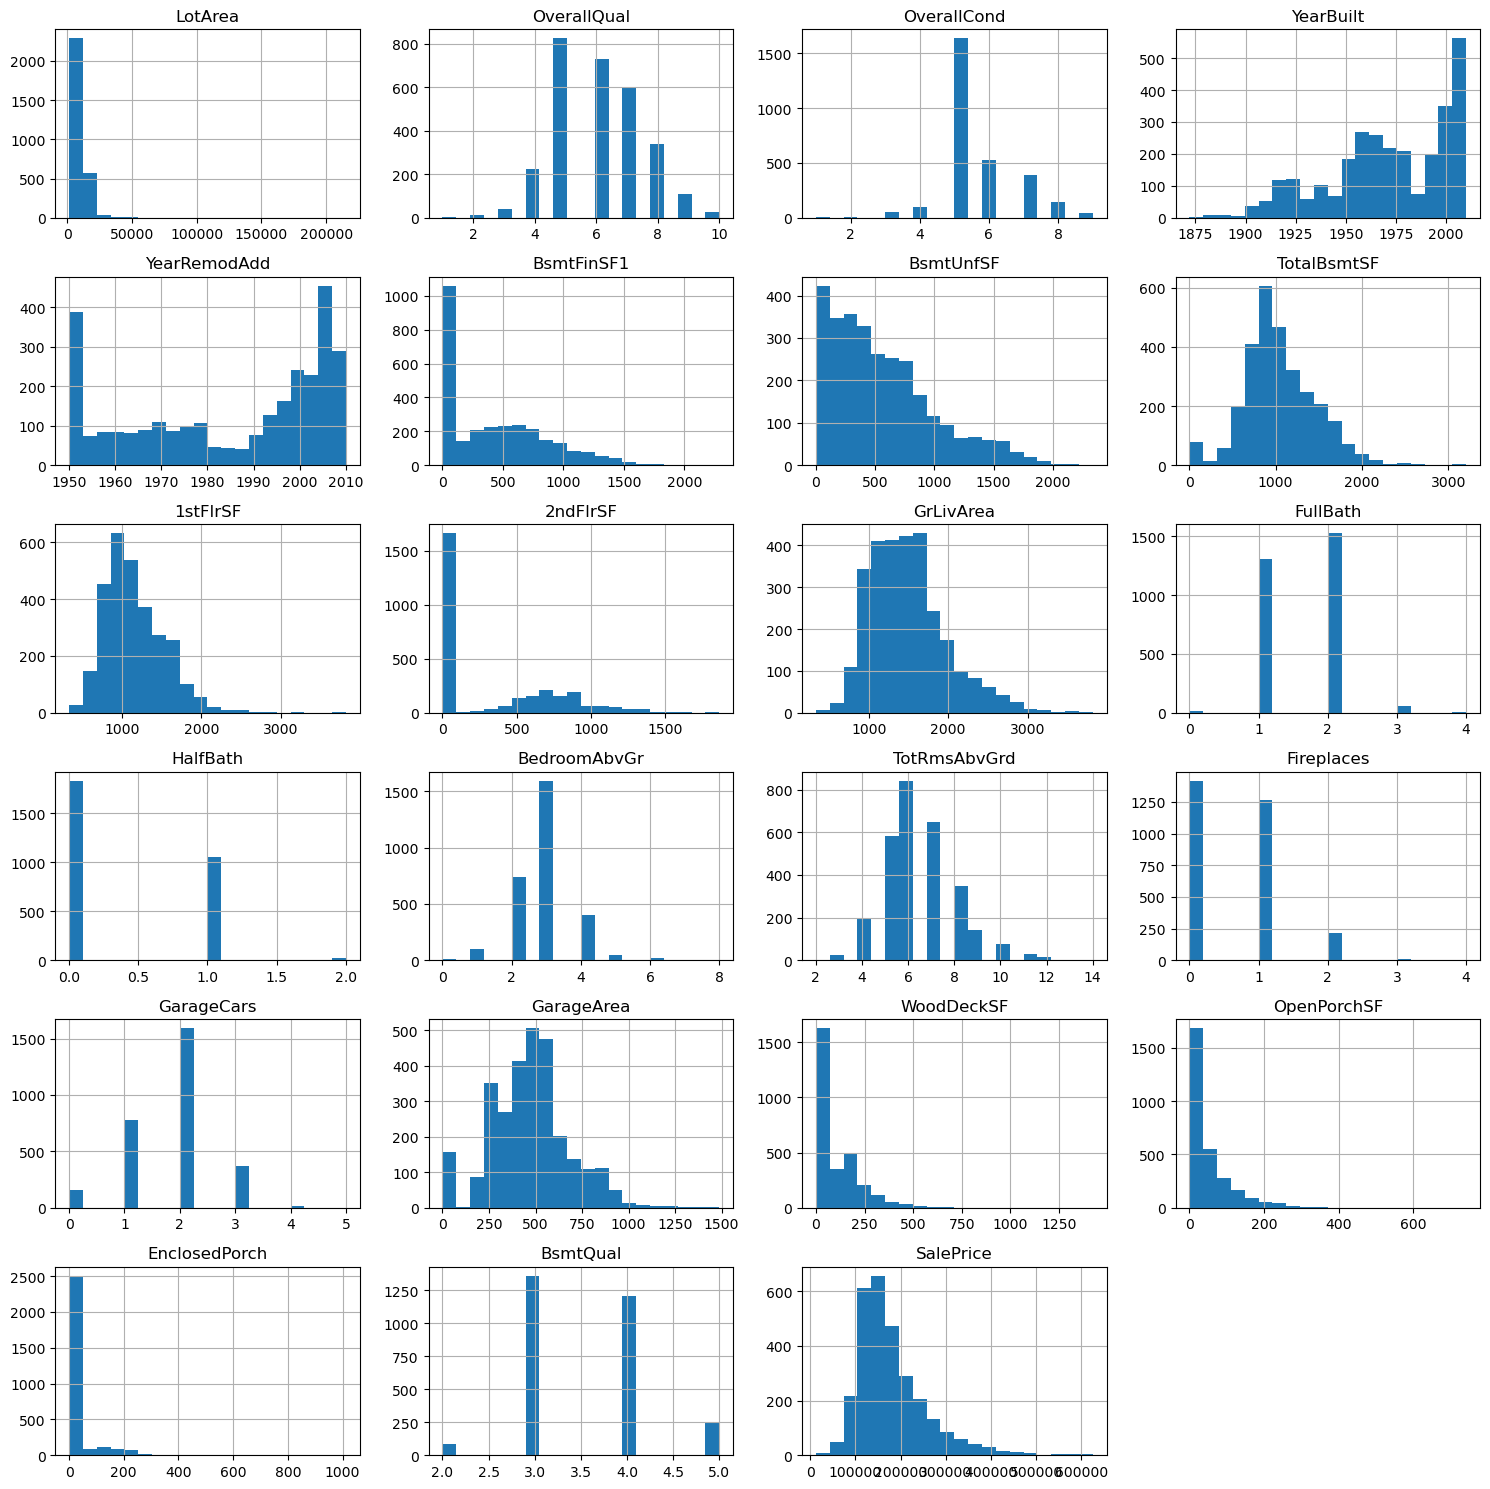

In [48]:
#histograms to visualize distribution of each feature
def plot_distributions(dataframe):
    num_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    dataframe[num_columns].hist(figsize=(15, 15), bins=20, layout=(6, 4))
    plt.tight_layout()
    plt.show()
plot_distributions(df_cleaned)

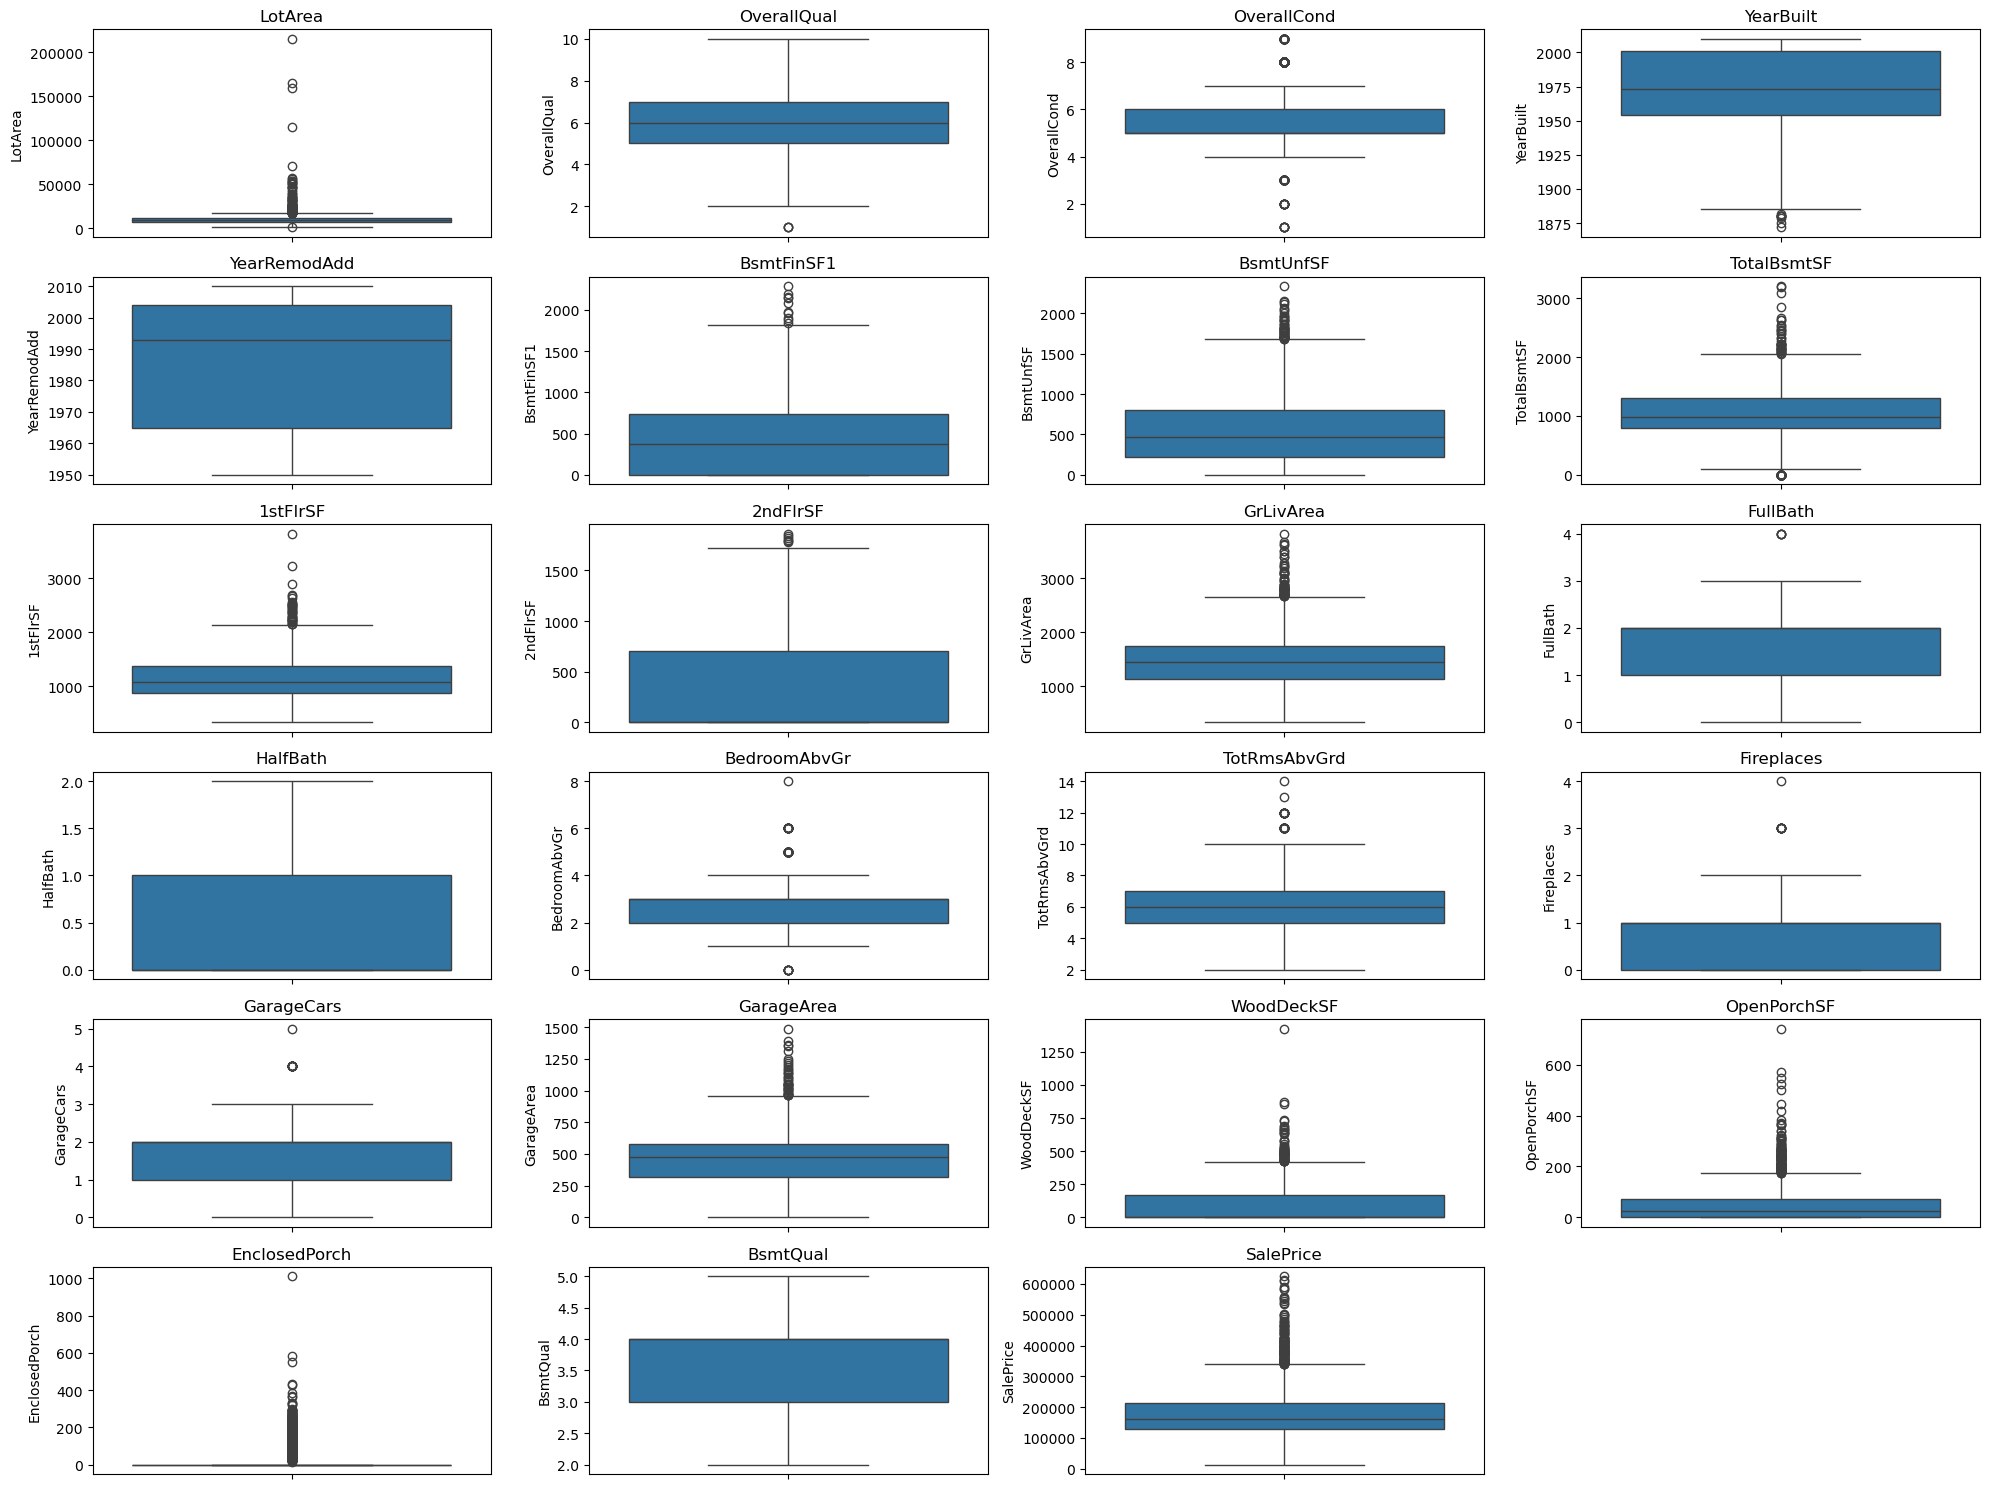

In [50]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(num_columns, 1):
        plt.subplot(6, 4, i)
        sns.boxplot(dataframe[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()

plot_boxplots(df_cleaned)

In [52]:
def summary_statistics(dataframe):
    print("Summary Statistics:")
    print(dataframe.describe())

summary_statistics(df_cleaned) 

Summary Statistics:
             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean    10120.229711     6.083906     5.566713  1971.296080   1984.254470   
std      7794.469991     1.396532     1.111292    30.272561     20.884877   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7466.500000     5.000000     5.000000  1954.000000   1965.000000   
50%      9444.500000     6.000000     5.000000  1973.000000   1993.000000   
75%     11521.500000     7.000000     6.000000  2001.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  2908.000000  2908.000000  2908.000000  2908.000000  2908.000000  ...   
mean    436.658528   560.858322  1047.269601  1154.885144   335.069120  ...   
std     436.817163   439.823652   419.916367   37

In [54]:
# Get correlations with the target variable (Y)
target_corr = df_cleaned.corr()['SalePrice'].sort_values(ascending=False)

# Display top 10 positively and negatively correlated features with the target variable
print("Top 10 positively correlated features:\n", target_corr.head(10))
print("\nTop 10 negatively correlated features:\n", target_corr.tail(10))


Top 10 positively correlated features:
 SalePrice      1.000000
OverallQual    0.806283
GrLivArea      0.721056
BsmtQual       0.685316
TotalBsmtSF    0.659033
GarageCars     0.655496
GarageArea     0.650716
1stFlrSF       0.640282
YearBuilt      0.565676
FullBath       0.552417
Name: SalePrice, dtype: float64

Top 10 negatively correlated features:
 Neighborhood_BrDale    -0.097574
OverallCond            -0.105014
Neighborhood_MeadowV   -0.122808
Neighborhood_Sawyer    -0.130369
EnclosedPorch          -0.131250
Neighborhood_BrkSide   -0.137817
Neighborhood_Edwards   -0.170237
Neighborhood_IDOTRR    -0.172565
Neighborhood_NAmes     -0.190868
Neighborhood_OldTown   -0.215570
Name: SalePrice, dtype: float64


In [56]:
def outliers(dataframe):
    outlier_info = {}
    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outlier_info[column] = len(outliers)
        print(f"{column}: {len(outliers)} outliers found")

    return outlier_info
outlier_info = outliers(df_cleaned)

LotArea: 124 outliers found
OverallQual: 3 outliers found
OverallCond: 251 outliers found
YearBuilt: 9 outliers found
YearRemodAdd: 0 outliers found
BsmtFinSF1: 10 outliers found
BsmtUnfSF: 53 outliers found
TotalBsmtSF: 116 outliers found
1stFlrSF: 36 outliers found
2ndFlrSF: 6 outliers found
GrLivArea: 69 outliers found
FullBath: 4 outliers found
HalfBath: 0 outliers found
BedroomAbvGr: 78 outliers found
TotRmsAbvGrd: 48 outliers found
Fireplaces: 11 outliers found
GarageCars: 17 outliers found
GarageArea: 40 outliers found
WoodDeckSF: 66 outliers found
OpenPorchSF: 155 outliers found
EnclosedPorch: 457 outliers found
BsmtQual: 0 outliers found
SalePrice: 134 outliers found


3) Put 1800 in the training set, 600 in the validation set and the rest in the test set

In [59]:
X = df_selected.drop('SalePrice', axis=1)  # Features
y = df_selected['SalePrice']  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=1800, random_state=42)

X_valid = X_temp[:600]
X_test = X_temp[600:]
y_valid = y_temp[:600]
y_test = y_temp[600:]

In [61]:
print(f"Training set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")

Training set: (1800, 46), Validation set: (600, 46), Test set: (508, 46)


Scaling the data: Z-score scaling as per the John hull textbook

In [64]:
# Standard Scaler (Z-score scaling)
scaler = StandardScaler()

# features
X_train_scaled = scaler.fit_transform(X_train)  
X_valid_scaled = scaler.transform(X_valid)     
X_test_scaled = scaler.transform(X_test)        

# target
y_train_scaled = (y_train - y_train.mean()) / y_train.std()
y_valid_scaled = (y_valid - y_train.mean()) / y_train.std()  
y_test_scaled = (y_test - y_train.mean()) / y_train.std()    


5)Derive the linear regression model to minimize the mean square error.

By default, the LinearRegression() class from scikit-learn fits a linear model by minimizing the Mean Squared Error. 

In [67]:
# Train the Linear Regression model on the scaled data
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

# Predict on the validation set and calculate MSE
y_valid_pred = linear_model.predict(X_valid_scaled)
valid_mse = mean_squared_error(y_valid_scaled, y_valid_pred)
print(f"Validation MSE for Linear Regression: {valid_mse}")

Validation MSE for Linear Regression: 0.10980996707850423


In [69]:
feature_weights = linear_model.coef_

# Create a DataFrame to display the feature names and their corresponding weights
weights_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Weight': feature_weights
})

print(weights_df.sort_values(by='Weight', key=abs, ascending=False))

                 Feature    Weight
1            OverallQual  0.215619
8               1stFlrSF  0.195252
9               2ndFlrSF  0.188259
7            TotalBsmtSF  0.135658
37  Neighborhood_NridgHt  0.131714
3              YearBuilt  0.111965
5             BsmtFinSF1  0.103270
10             GrLivArea  0.099118
17            GarageArea  0.098683
21              BsmtQual  0.097484
36  Neighborhood_NoRidge  0.083439
2            OverallCond  0.082052
13          BedroomAbvGr -0.069918
0                LotArea  0.065174
27  Neighborhood_Crawfor  0.061686
43  Neighborhood_StoneBr  0.059911
42  Neighborhood_Somerst  0.051449
24  Neighborhood_BrkSide  0.044027
4           YearRemodAdd  0.043886
14          TotRmsAbvGrd  0.043567
15            Fireplaces  0.040644
6              BsmtUnfSF -0.034382
44   Neighborhood_Timber  0.034306
30   Neighborhood_IDOTRR  0.029556
33    Neighborhood_NAmes  0.028721
26  Neighborhood_CollgCr  0.027480
28  Neighborhood_Edwards  0.026982
29  Neighborhood_Gil

6)Use Ridge Regression to derive the parameters for 𝜆 = 0.10, 0.30, 0.60.

In [72]:
# List of lamda (alpha) values for Ridge regression
ridge_alphas = [0.10, 0.30, 0.60]
ridge_models = {}

for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_scaled)  
    
    ridge_models[alpha] = ridge

    y_valid_pred = ridge.predict(X_valid_scaled)
    
    # Calculate MSE for the validation set
    valid_mse_ridge = mean_squared_error(y_valid_scaled, y_valid_pred)
    print(f"Validation MSE for Ridge (alpha={alpha}): {valid_mse_ridge}")

Validation MSE for Ridge (alpha=0.1): 0.10981325177093505
Validation MSE for Ridge (alpha=0.3): 0.10981971643370969
Validation MSE for Ridge (alpha=0.6): 0.10982916146386894


7)Use Lasso Regression to derive the parameters for 𝜆 = 0.02, 0.06, 0.10.

In [75]:
# List of lamda (alpha) values for Lasso regression
lasso_alphas = [0.02, 0.06, 0.10]
lasso_models = {}


for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train_scaled) 
    
    lasso_models[alpha] = lasso

    y_valid_pred = lasso.predict(X_valid_scaled)
    
    # Calculate MSE for the validation set
    valid_mse_lasso = mean_squared_error(y_valid_scaled, y_valid_pred)
    print(f"Validation MSE for Lasso (alpha={alpha}): {valid_mse_lasso}")

Validation MSE for Lasso (alpha=0.02): 0.12242878356615153
Validation MSE for Lasso (alpha=0.06): 0.14844750904587148
Validation MSE for Lasso (alpha=0.1): 0.17218256051228908


8)Use the validation set to pick the best model (specify the values of parameters and the regularization method and the value of 𝜆).

In [78]:
# Compare Ridge and Lasso models based on Validation MSE and select the best one
best_model = None
best_alpha = None
best_method = None
lowest_mse = float('inf')  # Initialize with a large number

# Check Ridge models
for alpha, model in ridge_models.items():
    y_valid_pred = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, y_valid_pred)
    if mse < lowest_mse:
        lowest_mse = mse
        best_model = model
        best_alpha = alpha
        best_method = 'Ridge'

# Check Lasso models
for alpha, model in lasso_models.items():
    y_valid_pred = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid_scaled, y_valid_pred)
    if mse < lowest_mse:
        lowest_mse = mse
        best_model = model
        best_alpha = alpha
        best_method = 'Lasso'

In [80]:
# Print the details of the best model
print(f"Best model is {best_method} with alpha={best_alpha} and Validation MSE={lowest_mse}")

Best model is Ridge with alpha=0.1 and Validation MSE=0.10981325177093505


In [82]:
# Print the parameters (coefficients) of the best model

feature_weights = best_model.coef_
weights_df = pd.DataFrame({'Feature': X_train.columns, 'Weight': feature_weights})
print(weights_df.sort_values(by='Weight', key=abs, ascending=False))

                 Feature    Weight
1            OverallQual  0.215609
8               1stFlrSF  0.194194
9               2ndFlrSF  0.187069
7            TotalBsmtSF  0.135642
37  Neighborhood_NridgHt  0.131556
3              YearBuilt  0.111908
5             BsmtFinSF1  0.103285
10             GrLivArea  0.100416
17            GarageArea  0.098684
21              BsmtQual  0.097492
36  Neighborhood_NoRidge  0.083327
2            OverallCond  0.082047
13          BedroomAbvGr -0.069887
0                LotArea  0.065177
27  Neighborhood_Crawfor  0.061539
43  Neighborhood_StoneBr  0.059821
42  Neighborhood_Somerst  0.051272
4           YearRemodAdd  0.043881
24  Neighborhood_BrkSide  0.043867
14          TotRmsAbvGrd  0.043556
15            Fireplaces  0.040650
6              BsmtUnfSF -0.034375
44   Neighborhood_Timber  0.034195
30   Neighborhood_IDOTRR  0.029391
33    Neighborhood_NAmes  0.028426
26  Neighborhood_CollgCr  0.027267
28  Neighborhood_Edwards  0.026787
29  Neighborhood_Gil

In [84]:
weights_df.shape

(46, 2)

9)Evaluate your model performance with the test data set.

In [87]:
best_ridge_alpha = 0.10 
best_ridge = Ridge(alpha=best_ridge_alpha)
best_ridge.fit(X_train_scaled, y_train_scaled)  

# Predict on the test set
y_test_pred_ridge = best_ridge.predict(X_test_scaled)

# Calculate the test MSE for Ridge
test_mse_ridge = mean_squared_error(y_test_scaled, y_test_pred_ridge)
print(f"Test MSE for Ridge Model (alpha={best_ridge_alpha}): {test_mse_ridge}")


Test MSE for Ridge Model (alpha=0.1): 0.14821420138332944


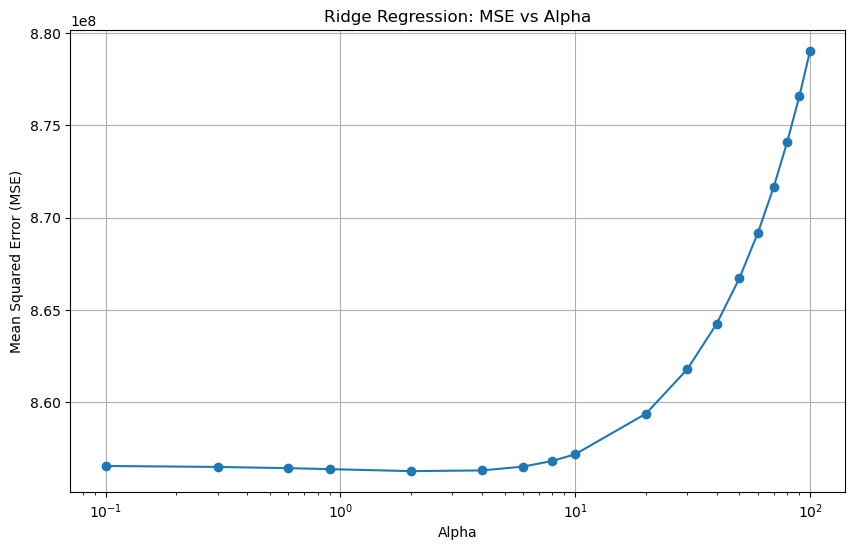

In [89]:

alphas = [0.1, 0.3, 0.6, 0.9, 2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

ridge_mse_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_test_pred = ridge.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_test_pred)
    ridge_mse_results[alpha] = mse

# Plotting the alpha values against MSE
plt.figure(figsize=(10, 6))
plt.plot(list(ridge_mse_results.keys()), list(ridge_mse_results.values()), marker='o')
plt.xscale('log') 
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: MSE vs Alpha')
plt.grid(True)
plt.show()

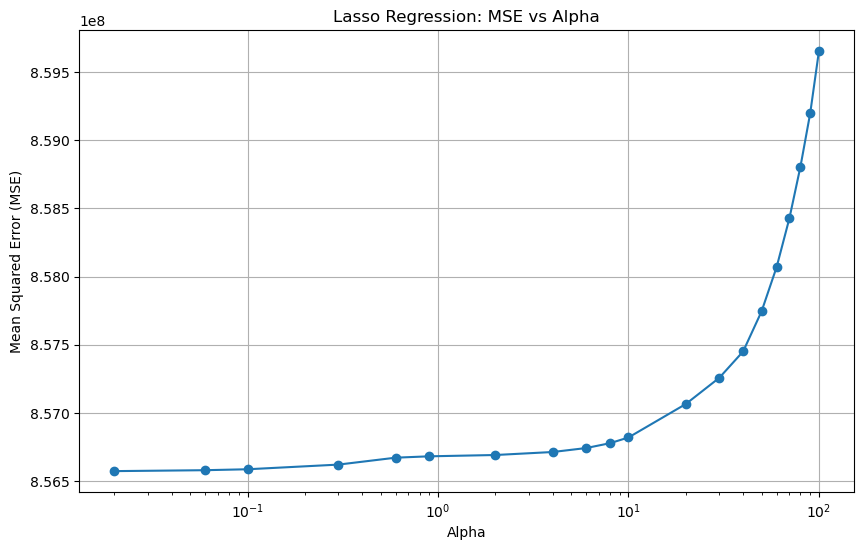

In [91]:
alphas_lasso = [0.02, 0.06, 0.10,0.3, 0.6, 0.9, 2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

lasso_mse_results = {}

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_test_pred = lasso.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_test_pred)
    lasso_mse_results[alpha] = mse

# Plotting the alpha values against MSE for Lasso
plt.figure(figsize=(10, 6))
plt.plot(list(lasso_mse_results.keys()), list(lasso_mse_results.values()), marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression: MSE vs Alpha')
plt.grid(True)
plt.show()